In [60]:
import tweepy

# TextBlob - Python library for processing textual data
from textblob import TextBlob

# WordCloud - Python linrary for creating image wordclouds
from wordcloud import WordCloud

# Pandas - Data manipulation and analysis library
import pandas as pd

# NumPy - mathematical functions on multi-dimensional arrays and matrices
import numpy as np

# Regular Expression Python module
import re

# Matplotlib - plotting library to create graphs and charts
import matplotlib.pyplot as plt

import nltk

# Settings for Matplotlib graphs and charts
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8

In [61]:
config = pd.read_csv("./config.csv")

In [62]:
# Twitter API config
twitterApiKey = config['twitterApiKey'][0]
twitterApiSecret = config['twitterApiSecret'][0]
twitterApiAccessToken = config['twitterApiAccessToken'][0]
twitterApiAccessTokenSecret = config['twitterApiAccessTokenSecret'][0]

In [63]:
# Authenticate
auth = tweepy.OAuthHandler(twitterApiKey, twitterApiSecret)
auth.set_access_token(twitterApiAccessToken, twitterApiAccessTokenSecret)
twitterApi = tweepy.API(auth, wait_on_rate_limit = True)

In [64]:
# キーワードからツイートを取得
tweets = tweepy.Cursor(twitterApi.search,  
                        count=1000,
                        q='COVID',
                        exclude_replies=True,
                        lang = 'en',
                        since='2021-06-27',
                        until='2021-06-28'
                        ).items(1000);


In [65]:
df = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['Tweet'])
df.head(1000)

,Tweet
0,RT @monteskw: Previous CJI Hon'ble Legand Shri...
1,Anti-vaxxer mistakes pub beer tent for Covid t...
2,RT @BrianMitchellMP: So why was the Treasurer ...
3,RT @RealMattCouch: The average age of death fr...
4,RT @shark_mendy: @VizagRailways @MP_MvvOfficia...
...,...
995,RT @SaludAmerica: Meet these real Latinos who:...
996,RT @kensleyanne: Every single athlete who made...
997,RT @angie_rasmussen: This is a huge story. An ...
998,"RT @TheArcofMass: On June 29, learn about comp..."


In [66]:
# Cleaning the tweets

def cleanUpTweet(txt):
    # Remove mentions
    txt = re.sub(r'@[A-Za-z0-9_]+', '', txt)
    # Remove hashtags
    txt = re.sub(r'#', '', txt)
    # Remove retweets:
    txt = re.sub(r'RT : ', '', txt)
    # Remove urls
    txt = re.sub(r'https?:\/\/[A-Za-z0-9\.\/]+', '', txt)
    return txt

In [67]:
def getTextSubjectivity(txt):
    return TextBlob(txt).sentiment.subjectivity

def getTextPolarity(txt):
    return TextBlob(txt).sentiment.polarity

In [68]:
df['Subjectivity'] = df['Tweet'].apply(getTextSubjectivity)
df['Polarity'] = df['Tweet'].apply(getTextPolarity)

In [69]:
def getTextAnalysis(a):
    if a < 0:
        return "Negative"
    elif a == 0:
        return "Neutral"
    else:
        return "Positive"

In [70]:
df['Sentiment'] = df['Polarity'].apply(getTextAnalysis)

In [71]:
df.head(1000)

,Tweet,Subjectivity,Polarity,Sentiment
0,RT @monteskw: Previous CJI Hon'ble Legand Shri...,0.166667,-0.166667,Negative
1,Anti-vaxxer mistakes pub beer tent for Covid t...,0.000000,0.000000,Neutral
2,RT @BrianMitchellMP: So why was the Treasurer ...,0.366667,0.200000,Positive
3,RT @RealMattCouch: The average age of death fr...,0.400000,-0.150000,Negative
4,RT @shark_mendy: @VizagRailways @MP_MvvOfficia...,0.050000,-0.100000,Negative
...,...,...,...,...
995,RT @SaludAmerica: Meet these real Latinos who:...,0.300000,0.200000,Positive
996,RT @kensleyanne: Every single athlete who made...,0.157143,-0.085714,Negative
997,RT @angie_rasmussen: This is a huge story. An ...,0.589286,0.114286,Positive
998,"RT @TheArcofMass: On June 29, learn about comp...",0.000000,0.000000,Neutral


In [72]:
df.to_csv("COVID_sentiment_textblob.csv")

In [73]:
positive = df[df['Sentiment'] == 'Positive']
neutral = df[df['Sentiment'] == 'Neutral']
negative = df[df['Sentiment'] == 'Negative']

print(str(positive.shape[0]/(df.shape[0])*100) + " % of positive tweets")
print(str(neutral.shape[0]/(df.shape[0])*100) + " % of neutral tweets")
print(str(negative.shape[0]/(df.shape[0])*100) + " % of negative tweets")

36.9 % of positive tweets
38.7 % of neutral tweets
24.4 % of negative tweets


<BarContainer object of 3 artists>

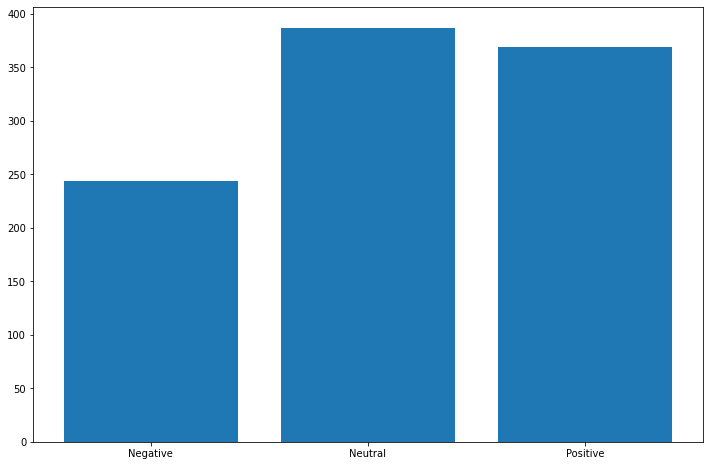

In [74]:
labels = df.groupby('Sentiment').count().index.values

values = df.groupby('Sentiment').size().values

plt.bar(labels, values)